In [12]:
# Import libraries
from dotenv import load_dotenv
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from sqlalchemy import create_engine

In [3]:
# Load environment variables
load_dotenv()
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')

In [4]:
# Connect to the Stack Overflow database
conn = psycopg2.connect(
    host=db_host,
    database=db_name,
    user=db_user,
    password=db_password
)

In [5]:
# With the env variables loaded we can insert them into the engine connection string.
engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}/{db_name}")
connection = engine.connect()

In [6]:

# Define HEART metrics for Stack Overflow
heart_metrics = {
    'Happiness': 'Measure of user satisfaction and happiness with the Questions & Answers product.',
    'Engagement': 'Measure of user interaction and activity on the platform.',
    'Adoption': 'Measure of user acquisition and growth of Stack Overflow user base.',
    'Retention': 'Measure of user retention and continued usage of the platform over time.',
    'Task Success': 'Measure of user ability to accomplish their goals and tasks effectively on Stack Overflow.'
}

# Stack Overflow User Adoption Analysis

This analysis will focus on the adoption of new stack overflow users and is based on the HEART metrics system developed by Google. 

In [7]:
for metric, description in heart_metrics.items():
    print(f"{metric}: {description}")

Happiness: Measure of user satisfaction and happiness with the Questions & Answers product.
Engagement: Measure of user interaction and activity on the platform.
Adoption: Measure of user acquisition and growth of Stack Overflow user base.
Retention: Measure of user retention and continued usage of the platform over time.
Task Success: Measure of user ability to accomplish their goals and tasks effectively on Stack Overflow.


First we will query the database to determine how many users signed up each month.

In [8]:
query = """
SELECT TO_CHAR(creation_date, 'YYYY-MM') AS YearMonth,
    COUNT(*) AS Count 
FROM users 
GROUP BY YearMonth
ORDER BY YearMonth;
"""
df = pd.read_sql(query, connection)
df

,yearmonth,count
0,2008-07,9
1,2008-08,2806
2,2008-09,9643
3,2008-10,3544
4,2008-11,2857
...,...,...
172,2022-11,264690
173,2022-12,249281
174,2023-01,217014
175,2023-02,184360


Now, lets plot this as a bar chart to show the user sign ups in a more accessible format.

/var/folders/yr/3n5v6lks7kdf1dzxf43l8mlw0000gp/T/ipykernel_71679/2679414845.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_month_pattern)


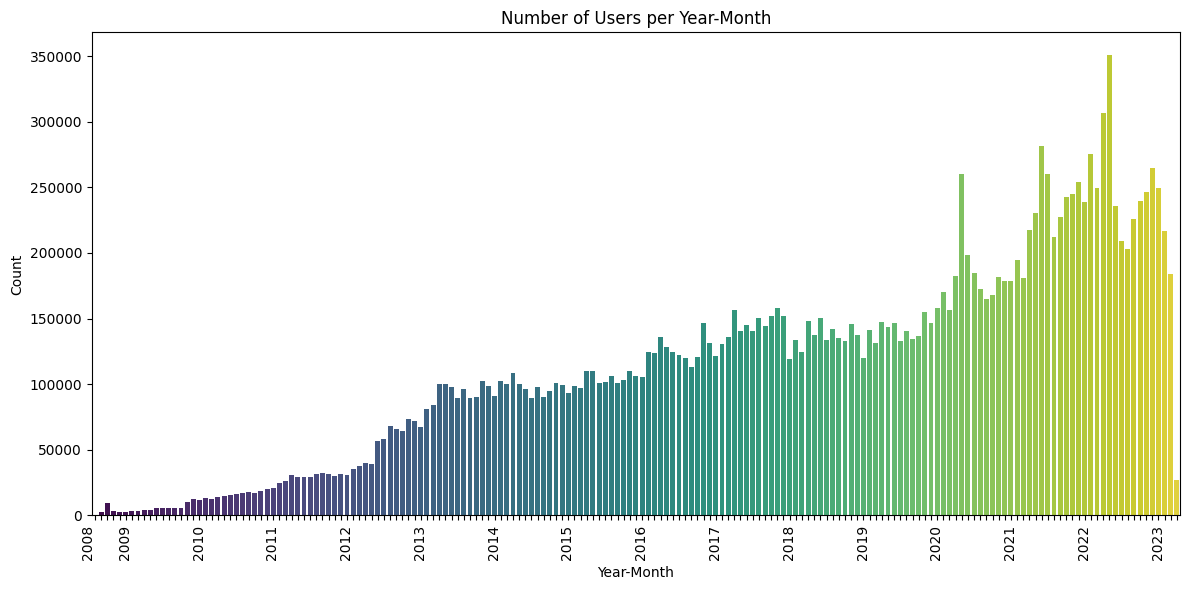

In [16]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="yearmonth", y="count", data=df, hue="yearmonth", palette="viridis")
plt.title("Number of Users per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability

# Get unique years for dropdown options
unique_years = df['yearmonth'].str.split('-').str[0].unique()

# Create a list with the desired pattern
year_month_pattern = []

for year in unique_years:
    year_month_pattern.append(year)
    year_month_pattern.extend([' '] * (df['yearmonth'].str.startswith(year).sum() - 1))

ax.set_xticklabels(year_month_pattern)

# Show the plot
plt.tight_layout()
plt.show()

From the bar chart we can see a clear upward trend in the number of new user accounts created over time. This would suggest that the popularity of Stack Overflow has increased over time and will likely continue to do so. 

There are spikes in account creations in the early-mid parts of 2020, 2021, 2022 and to a lesser extent 2023. Without further data it is not possible to conclude what caused these spikes. However, collaboration with other teams i.e. marketing, may reveal insights as to their cause. 

It may be useful to view each year separately for more detailed analysis. 

Dropdown(description='Select Year:', index=8, options=('2008', '2009', '2010', '2011', '2012', '2013', '2014',…

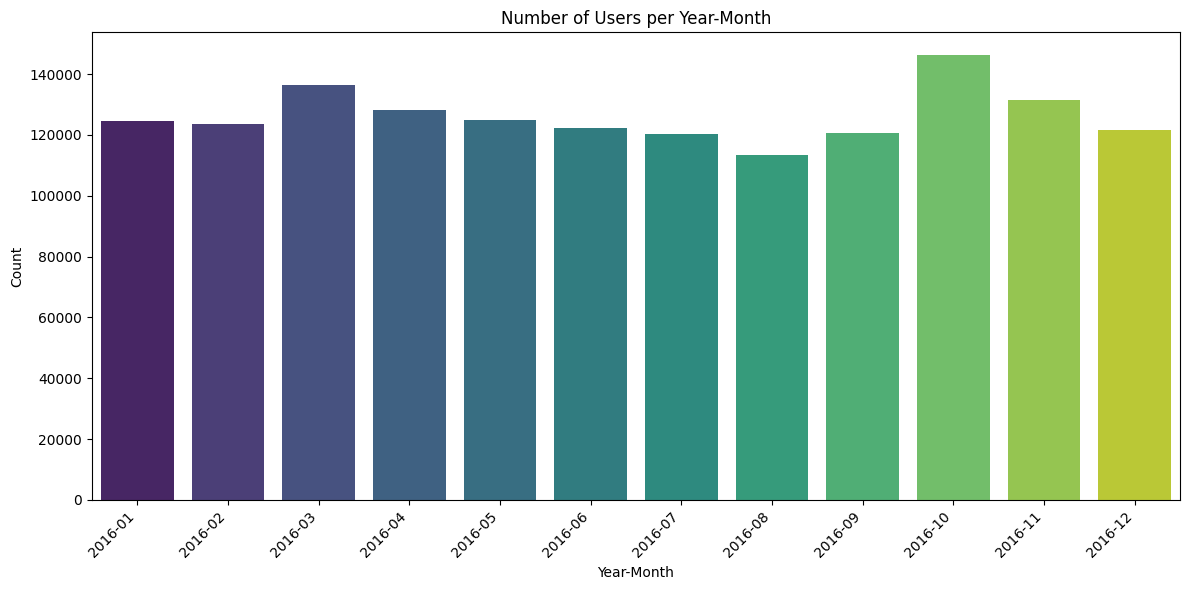

In [17]:
def plot_interactive_chart(selected_year):
    filtered_df = df[df['yearmonth'].str.startswith(str(selected_year))]
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="yearmonth", y="count", data=filtered_df, hue="yearmonth", palette="viridis")
    plt.title("Number of Users per Year-Month")
    plt.xlabel("Year-Month")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Get unique years for dropdown options
unique_years = df['yearmonth'].str.split('-').str[0].unique()

# Create a dropdown for year selection
year_dropdown = widgets.Dropdown(
    options=unique_years,
    description='Select Year:',
    disabled=False,
)

# Display Year Dropdown selector
display(year_dropdown)

# Define the function to update the plot based on the selected year
def update_plot(change):
    clear_output(wait=True)  # Clear the previous chart only
    display(year_dropdown)  # Redisplay the dropdown
    plot_interactive_chart(change.new)

# Connect the dropdown to the update function
year_dropdown.observe(update_plot, names='value')

# Display the dropdown and initial plot
plot_interactive_chart(unique_years[0]) 